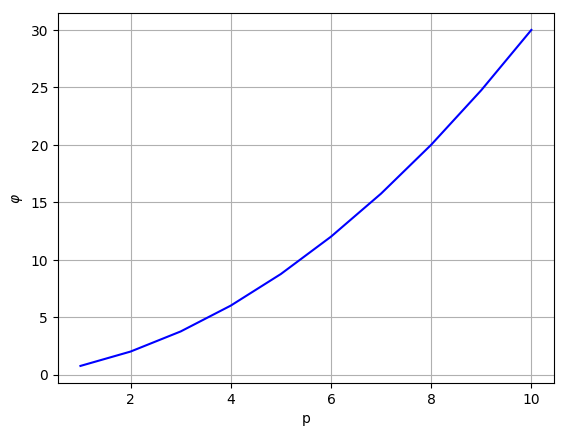

In [2]:
using JuMP, Ipopt, PyPlot

# define function to create JuMP model
function getJuMPmodel(p)
    
m = Model(solver=IpoptSolver(max_iter=100,tol=1e-8,print_level=0))
@variable(m,x1>=0)
@variable(m,x2>=0,start=1)
@constraint(m, x1+x2 == p)
@NLconstraint(m, x1/x2 == 1)
@NLobjective(m, Min, x1+x2^2) 
    
return m
    
end

# create vector spanning parameter range and placeholder for optimal objective
 p = 1:1:10
 φ = zeros(length(p))

# run loop to solve problem
for j=1:length(p)
    m=getJuMPmodel(p[j])
    status=solve(m)
    φ[j]=getobjectivevalue(m)
end
# plot optimal objective as function of p
plot(p,φ,color="blue"); grid("on"); xlabel("p"); ylabel(L"$\varphi$")
savefig("plot.pdf");